In [1]:
import cv2
import json
import numpy as np
import pandas as pd

In [2]:
# json読み込み
HEIGHT = 768
WIDTH = 768
jsonPath = "../data/polygons.jsonl"
with open(jsonPath) as json_file:
    json_list = list(json_file)

In [3]:
def coordinates_to_masks( coordinates, shape):
    masks = []
    for coord in coordinates:
        mask = np.zeros(shape, dtype=np.uint8)
        cv2.fillPoly(mask, [np.array(coord)], 1)
        masks.append(mask)
    return masks

def mask2enc(mask, n=1):
    pixels = mask.T.flatten()
    encs = []
    for i in range(1,n+1):
        p = (pixels == i).astype(np.int8)
        if p.sum() == 0: encs.append(np.nan)
        else:
            p = np.concatenate([[0], p, [0]])
            runs = np.where(p[1:] != p[:-1])[0] + 1
            runs[1::2] -= runs[::2]
            encs.append(' '.join(str(x) for x in runs))
    return encs

In [4]:
dataset = []
for item_str in json_list:
    item = json.loads(item_str)
    anno = item['annotations']
    row = {}
    for ann in anno:
        row = {}
        row["id"] = item["id"]
        row["type"] = ann["type"]
        row["coordinates"] = ann["coordinates"]
        row["mask"] = coordinates_to_masks(ann["coordinates"], (HEIGHT, WIDTH))[0]
        row["rle"] = mask2enc(row["mask"])
        dataset.append(row)
dataset = pd.DataFrame(dataset, columns=["id", "type", "coordinates", "mask", "rle"])

In [5]:
dataset.head()

,id,type,coordinates,mask,rle
0,0006ff2aa7cd,glomerulus,"[[[167, 249], [166, 249], [165, 249], [164, 24...","[[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",[2 105 769 107 1537 111 2305 113 3073 114 3841...
1,0006ff2aa7cd,blood_vessel,"[[[283, 109], [282, 109], [281, 109], [280, 10...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[208982 10 209748 17 210514 22 211280 27 21204...
2,0006ff2aa7cd,blood_vessel,"[[[104, 292], [103, 292], [102, 292], [101, 29...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[55540 4 56306 8 57073 11 57840 14 58608 15 59...
3,0006ff2aa7cd,blood_vessel,"[[[505, 442], [504, 442], [503, 442], [502, 44...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[375967 11 376732 20 377497 26 378263 30 37902...
4,0006ff2aa7cd,blood_vessel,"[[[375, 477], [374, 477], [373, 477], [372, 47...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[250808 5 251575 7 252342 10 253110 11 253878 ...


In [6]:
dataset['unique_id'] = dataset['id'] + '_' + dataset.index.astype(str)
dataset.set_index('unique_id', inplace=True)
dataset.head()

,id,type,coordinates,mask,rle
unique_id,,,,,
0006ff2aa7cd_0,0006ff2aa7cd,glomerulus,"[[[167, 249], [166, 249], [165, 249], [164, 24...","[[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",[2 105 769 107 1537 111 2305 113 3073 114 3841...
0006ff2aa7cd_1,0006ff2aa7cd,blood_vessel,"[[[283, 109], [282, 109], [281, 109], [280, 10...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[208982 10 209748 17 210514 22 211280 27 21204...
0006ff2aa7cd_2,0006ff2aa7cd,blood_vessel,"[[[104, 292], [103, 292], [102, 292], [101, 29...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[55540 4 56306 8 57073 11 57840 14 58608 15 59...
0006ff2aa7cd_3,0006ff2aa7cd,blood_vessel,"[[[505, 442], [504, 442], [503, 442], [502, 44...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[375967 11 376732 20 377497 26 378263 30 37902...
0006ff2aa7cd_4,0006ff2aa7cd,blood_vessel,"[[[375, 477], [374, 477], [373, 477], [372, 47...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[250808 5 251575 7 252342 10 253110 11 253878 ...


In [7]:
dataset.to_csv('labels_all_class.csv', index=False)

In [8]:
print(len(dataset["id"].unique()))

1633


In [10]:
wsi = pd.read_csv("../data/wsi_meta.csv")
tile_meta = pd.read_csv("../data/tile_meta.csv")

In [11]:
wsi.head()

,source_wsi,age,sex,race,height,weight,bmi
0,1,58,F,W,160.0,59.0,23.0
1,2,56,F,W,175.2,139.6,45.5
2,3,73,F,W,162.3,87.5,33.2
3,4,53,M,B,166.0,73.0,26.5


<Axes: >

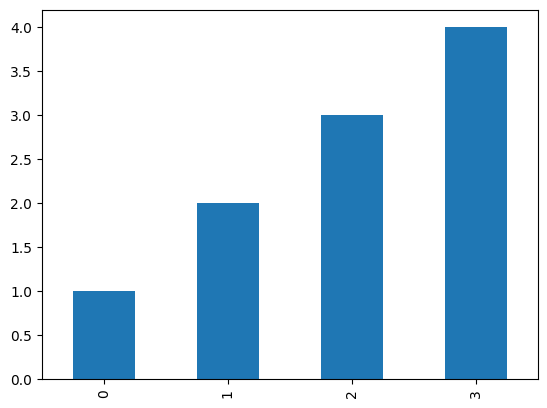

In [12]:
wsi["source_wsi"].plot.bar()

<Axes: xlabel='dataset'>

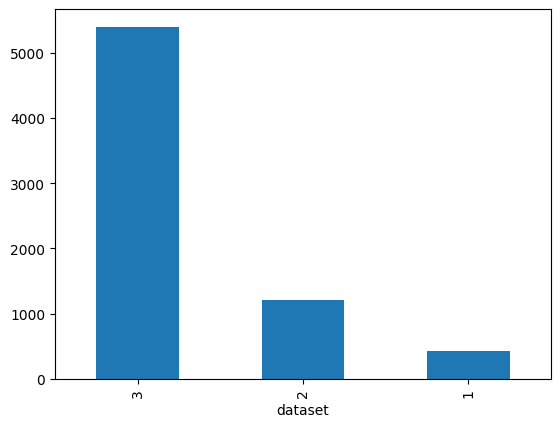

In [13]:
tile_meta["dataset"].value_counts().plot.bar()

In [25]:
list(tile_meta[tile_meta["dataset"] == 2]["id"].values)

['0006ff2aa7cd',
 '00168d1b7522',
 '003504460b3a',
 '004daf1cbe75',
 '005715f0a313',
 '00654cc08aac',
 '00ca2f4c8918',
 '00da8fdf2391',
 '00f560a6a72b',
 '014b60dfe193',
 '016c33dacfa1',
 '019390572feb',
 '01a7fca6263b',
 '025ec20b8b73',
 '0276eb166cce',
 '02cf5c2db152',
 '02d2022943a4',
 '02f563532696',
 '033a656390b2',
 '033e91059cec',
 '03d335057db3',
 '041588f936e1',
 '041ad8166762',
 '041b985201d6',
 '0478279e6e16',
 '04c08080b2ae',
 '04eaacfbb9f6',
 '055348e2fece',
 '05dd21a61705',
 '065ed4490163',
 '0667203ecaac',
 '0672b96aaccc',
 '0717863ca2cb',
 '07199abc71ec',
 '0765f249adeb',
 '07b809228ef4',
 '0804072fa02a',
 '0828cc1c22be',
 '0870e4f9d580',
 '08a1b468620a',
 '08e2fa7b08f0',
 '08ea167cfd5d',
 '08ed99cd1c93',
 '09644decc895',
 '09c06b79292c',
 '09d736c55365',
 '09df7e1fe1cc',
 '09e1916da449',
 '09e3d02dfd1c',
 '0a152cf103e4',
 '0a1d277fb473',
 '0a4ddecc55f0',
 '0a631efbc3e4',
 '0a993633aa5e',
 '0ab9d193fcf6',
 '0ae9282b7594',
 '0b935dd9ef6a',
 '0b989fe8238f',
 '0ba172f33ea6

In [35]:
idx = dataset["id"].isin(list(tile_meta[tile_meta["dataset"] == 2]["id"].values))
len(dataset[idx]["id"].unique())

1206